In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
df = df.dropna()
print(df.shape)
print(list(df.columns))

(48842, 15)
['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [3]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [4]:
df.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [5]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace = True)

In [6]:
# code will replace the special character to nan and then drop the columns 
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
#dropping the NaN rows now 
df.dropna(how='any',inplace=True)

In [7]:
df["Target_binary"] = df["income"].map(lambda x: 1 if x == ">50K" else 0)
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,gender,capital gain,capital loss,hours per week,country,income,Target_binary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0


In [8]:
df.drop('income', inplace = True, axis = 1)
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,gender,capital gain,capital loss,hours per week,country,Target_binary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [9]:
df["Country"] = df["country"].map(lambda x: 1 if x == "United-States" else 0)
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,gender,capital gain,capital loss,hours per week,country,Target_binary,Country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,1


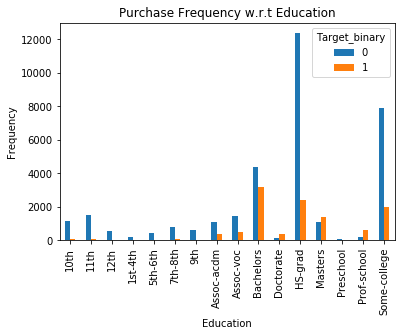

In [10]:
pd.crosstab(df.education,df.Target_binary).plot(kind='bar')
plt.title('Purchase Frequency w.r.t Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [11]:
df.shape

(45222, 16)

In [12]:
df.drop(['educational-num'], axis=1, inplace=True)

In [13]:
df.head()

,age,workclass,fnlwgt,education,marital,occupation,relationship,race,gender,capital gain,capital loss,hours per week,country,Target_binary,Country
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,1
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,1
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,1


In [14]:
df.drop(['fnlwgt', 'occupation', 'relationship', 'race', 'capital gain', 'capital loss', 'hours per week', 'Country'], axis=1, inplace=True)

In [15]:
df.head()

,age,workclass,education,marital,gender,country,Target_binary
0,25,Private,11th,Never-married,Male,United-States,0
1,38,Private,HS-grad,Married-civ-spouse,Male,United-States,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Male,United-States,1
3,44,Private,Some-college,Married-civ-spouse,Male,United-States,1
5,34,Private,10th,Never-married,Male,United-States,0


In [16]:
cat_vars = ['age','workclass', 'education','marital','gender']
for var in cat_vars:
    cat_list='var'+'_'+var #for nomeclature of the columns #This line was missing from my code which may have been causing the problems !!!
    cat_list = pd.get_dummies(df[var], prefix=var) # creating dummy variables
    

In [17]:
df1=df.join(cat_list) #creating dummy variable and concatenating with the dataframes
df=df1

In [18]:
df.shape

(45222, 9)

In [19]:
df.head()

,age,workclass,education,marital,gender,country,Target_binary,gender_Female,gender_Male
0,25,Private,11th,Never-married,Male,United-States,0,0,1
1,38,Private,HS-grad,Married-civ-spouse,Male,United-States,0,0,1
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Male,United-States,1,0,1
3,44,Private,Some-college,Married-civ-spouse,Male,United-States,1,0,1
5,34,Private,10th,Never-married,Male,United-States,0,0,1


In [20]:
df.tail()

,age,workclass,education,marital,gender,country,Target_binary,gender_Female,gender_Male
48837,27,Private,Assoc-acdm,Married-civ-spouse,Female,United-States,0,1,0
48838,40,Private,HS-grad,Married-civ-spouse,Male,United-States,1,0,1
48839,58,Private,HS-grad,Widowed,Female,United-States,0,1,0
48840,22,Private,HS-grad,Never-married,Male,United-States,0,0,1
48841,52,Self-emp-inc,HS-grad,Married-civ-spouse,Female,United-States,1,1,0


In [21]:
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]  # discard the columns which have been converted in to dummy variables

In [22]:
data_final=df[to_keep] 

In [23]:
df.shape

(45222, 9)

In [24]:
df.head()

,age,workclass,education,marital,gender,country,Target_binary,gender_Female,gender_Male
0,25,Private,11th,Never-married,Male,United-States,0,0,1
1,38,Private,HS-grad,Married-civ-spouse,Male,United-States,0,0,1
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Male,United-States,1,0,1
3,44,Private,Some-college,Married-civ-spouse,Male,United-States,1,0,1
5,34,Private,10th,Never-married,Male,United-States,0,0,1


In [25]:
df.tail()

,age,workclass,education,marital,gender,country,Target_binary,gender_Female,gender_Male
48837,27,Private,Assoc-acdm,Married-civ-spouse,Female,United-States,0,1,0
48838,40,Private,HS-grad,Married-civ-spouse,Male,United-States,1,0,1
48839,58,Private,HS-grad,Widowed,Female,United-States,0,1,0
48840,22,Private,HS-grad,Never-married,Male,United-States,0,0,1
48841,52,Self-emp-inc,HS-grad,Married-civ-spouse,Female,United-States,1,1,0


In [26]:
X = data_final.loc[:,data_final.columns!= 'Target_binary']
y = data_final.loc[:,data_final.columns == 'Target_binary']

In [29]:
y

,Target_binary
0,0
1,0
2,1
3,1
5,0
...,...
48837,0
48838,1
48839,0
48840,0


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=12)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logreg=LogisticRegression() #This command was missing @ this point in my lines of code
logreg.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [40]:
from sklearn import metrics 
print(metrics.accuracy_score(y_test,y_pred))
#Highly Imbalanced,Accuracy will not be best to judge our Model

0.7479214576331151


In [41]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      8456
           1       0.00      0.00      0.00      2850

    accuracy                           0.75     11306
   macro avg       0.37      0.50      0.43     11306
weighted avg       0.56      0.75      0.64     11306



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
Threshold=0.35
preds=np.where(logreg.predict_proba(X_test)[:,1]>Threshold,1,0)
preds1=logreg.predict_proba(X_test)[:,1]

In [43]:
threshold_score = pd.DataFrame(data=[metrics.accuracy_score(y_test, preds), 
                                     metrics.recall_score(y_test, preds),
                                     metrics.precision_score(y_test, preds),
                                     metrics.roc_auc_score(y_test, preds)],
                              index=["accuracy", "recall", "precision", "roc_auc_score"],columns=['Values'])
threshold_score

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Values
accuracy,0.747921
recall,0.000000
precision,0.000000
roc_auc_score,0.500000


In [44]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      8456
           1       0.00      0.00      0.00      2850

    accuracy                           0.75     11306
   macro avg       0.37      0.50      0.43     11306
weighted avg       0.56      0.75      0.64     11306



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'ROC Curve')

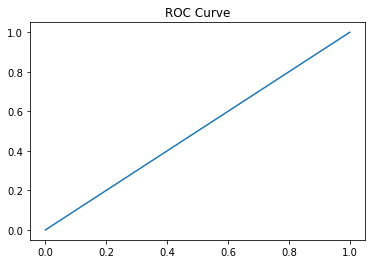

In [45]:
import matplotlib
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
plt.plot(fpr,tpr)
plt.title('ROC Curve')